In [3]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = "MNIST"

loss_value = 0.1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()
data_modifications = ['data_0']

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 600
Experiment folders:  ['model_0_data_10', 'model_9_data_10', 'model_8_data_10', 'model_1_data_10', 'model_3_data_10', 'model_2_data_10', 'model_7_data_10', 'model_6_data_10', 'model_4_data_10', 'model_5_data_10']
Different data levels where loss landscapes were computed: ['data_0']
The base train size is:  600
Data levels where models were trained:  [0]
The number of model parameters is  235146


In [4]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

In [6]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    print(all_log_rn)
    print(all_test_loss)


Processing data modification folder: data_0
[[787997.052216624], [825312.2002178561], [825311.489793521], [806548.3347158425], [843517.3415442628], [807389.584224362], [806561.1245081378], [806999.7354713912], [825117.8191362368], [806955.4436535311]]
[[0.6132048065960407], [0.6324106614291668], [0.6410624995827675], [0.6195744173228741], [0.6400422614812851], [0.6294425040483475], [0.6397046513855458], [0.6411440543830395], [0.6529283992946148], [0.6599155469238758]]


In [13]:
all_log_rn_list = [val for sublist in all_log_rn for val in sublist]
all_test_loss_list = [val for sublist in all_test_loss for val in sublist]

print(all_log_rn_list)
print(all_test_loss_list)

[787997.052216624, 825312.2002178561, 825311.489793521, 806548.3347158425, 843517.3415442628, 807389.584224362, 806561.1245081378, 806999.7354713912, 825117.8191362368, 806955.4436535311]
[0.6132048065960407, 0.6324106614291668, 0.6410624995827675, 0.6195744173228741, 0.6400422614812851, 0.6294425040483475, 0.6397046513855458, 0.6411440543830395, 0.6529283992946148, 0.6599155469238758]


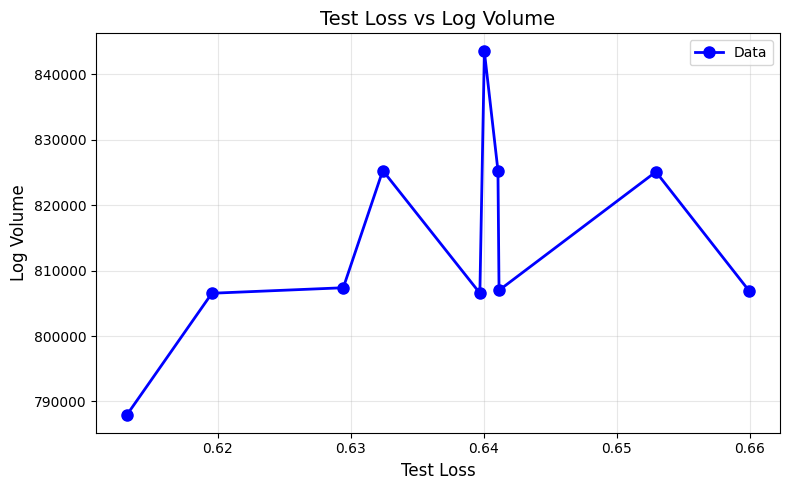

In [ ]:
from minima_volume.volume_funcs import plot_pair_metrics


plot_pair_metrics(
    # metric1_values=all_test_loss_list,
    metric1_values=all_log_rn_list,
    metric2_values=all_test_loss_list,
    # metric2_values=all_log_rn_list,
    # xlabel="Test Loss",
    xlabel="Log Volume",
    ylabel="Test Loss",
    # ylabel="Log Volume",
    title="Test Loss vs Log Volume",
    display=True
)